In [10]:
#Machine Learning Examples

In [3]:
#Supervised learning demo on classic iris database
#We use a classic decision tree classifier



# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Summary of the data
print("Summary of the Iris Dataset:")
print("Number of samples:", iris.data.shape[0])
print("Number of features:", iris.data.shape[1])
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Summary of the Iris Dataset:
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


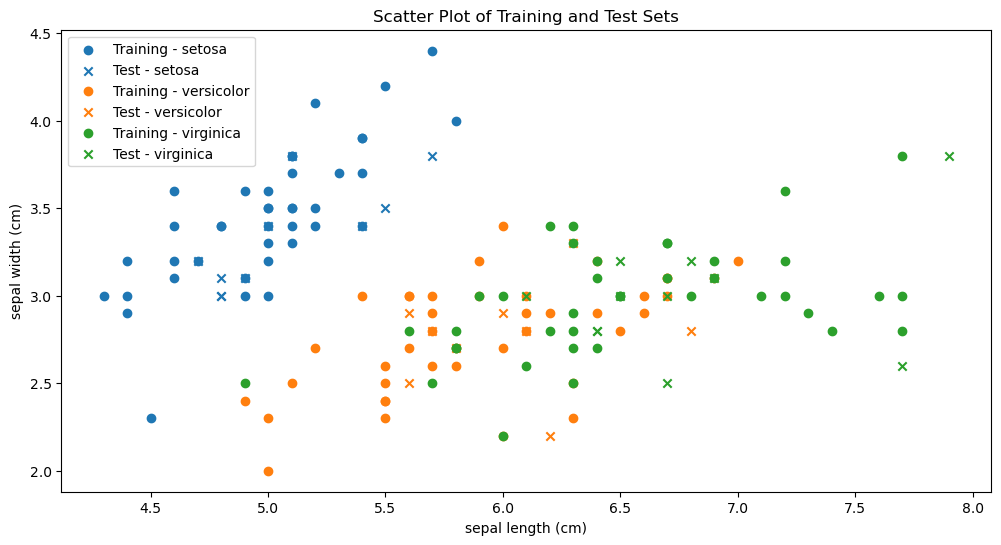

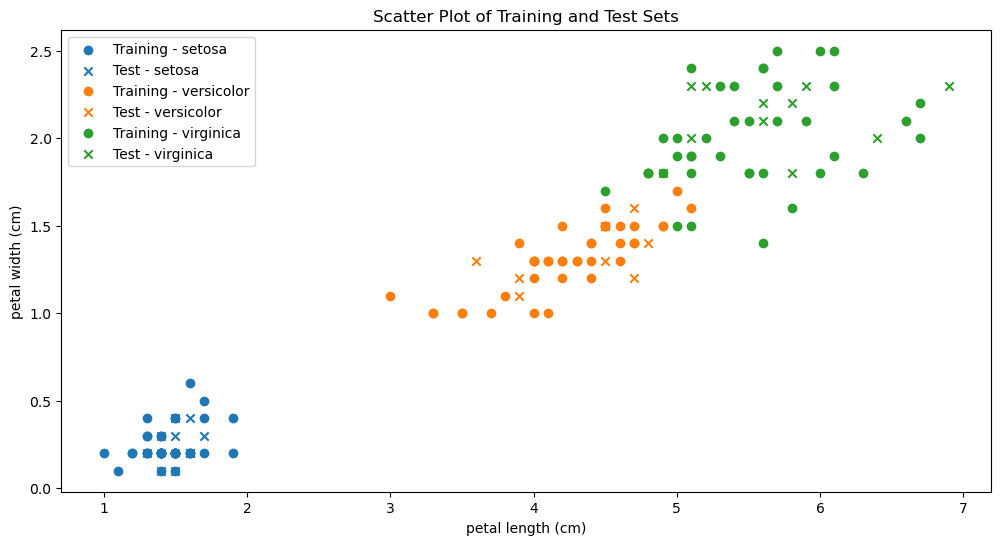

Accuracy: 1.0


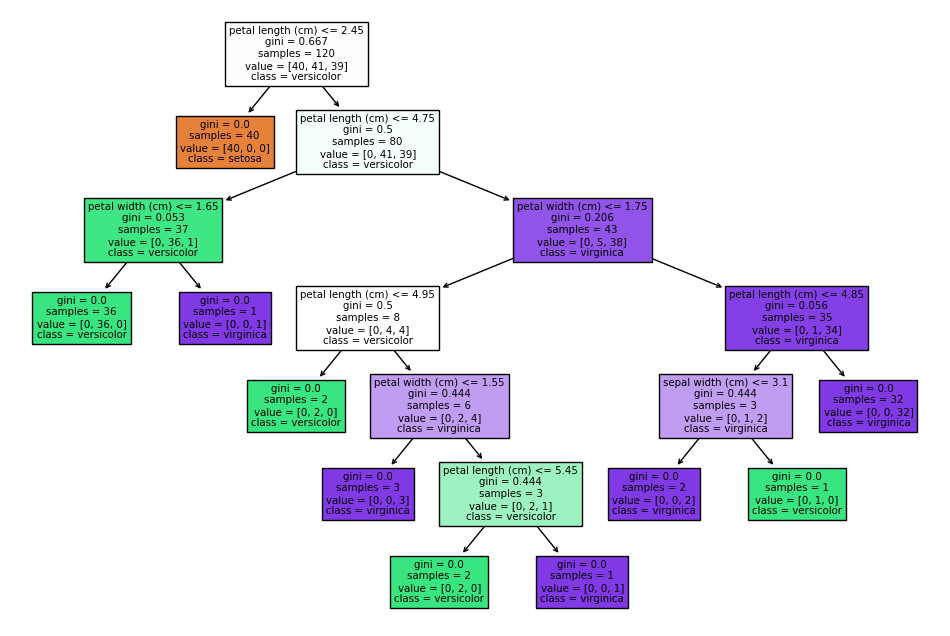

In [13]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


# Scatter plot of training and test sets
plt.figure(figsize=(12, 6))

# Plot each class separately
for i in range(len(target_names)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Training - {target_names[i]}', color='C'+str(i))
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Test - {target_names[i]}', marker='x', color='C'+str(i))

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Scatter Plot of Training and Test Sets')
plt.legend()
plt.show()

# Scatter plot of training and test sets
plt.figure(figsize=(12, 6))

# Plot each class separately
for i in range(len(target_names)):
    plt.scatter(X_train[y_train == i, 2], X_train[y_train == i, 3], label=f'Training - {target_names[i]}', color='C'+str(i))
    plt.scatter(X_test[y_test == i, 2], X_test[y_test == i, 3], label=f'Test - {target_names[i]}', marker='x', color='C'+str(i))

plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Scatter Plot of Training and Test Sets')
plt.legend()
plt.show()


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()


[*********************100%%**********************]  7 of 7 completed
/home/dmcneill/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 2:
['DJI', 'GOOG']

Cluster 1:
['AAPL', 'BTC-USD']

Cluster 0:
['MSFT', 'TSLA', 'GLD']



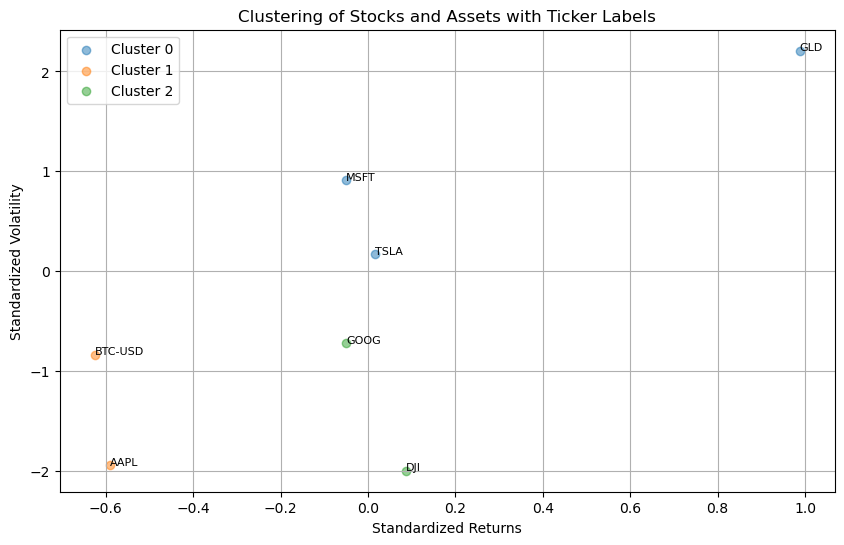

In [18]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the list of stocks and assets
tickers = ['DJI', 'AAPL', 'MSFT', 'GOOG', 'TSLA', 'GLD', 'BTC-USD']

# Download historical price data
data = yf.download(tickers, start='2014-01-01', end='2024-01-01', interval='1d')['Adj Close']

# Calculate daily returns and volatility
returns = data.pct_change().dropna()
volatility = returns.std(axis=0)

# Convert feature names to strings
returns.columns = returns.columns.astype(str)
volatility.index = volatility.index.astype(str)

# Standardize the data
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)
#returns_scaled = returns
volatility_scaled = scaler.fit_transform(volatility.values.reshape(-1, 1))
#volatility_scaled = (volatility.values.reshape(-1, 1))


# Ensure both arrays have the same number of rows
min_rows = min(returns_scaled.shape[0], volatility_scaled.shape[0])
returns_scaled = returns_scaled[:min_rows]
volatility_scaled = volatility_scaled[:min_rows]

# Concatenate the scaled returns and volatility
data_scaled = np.concatenate([returns_scaled, volatility_scaled], axis=1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Label the clusters and list tickers in each cluster
cluster_labels = {}
for i in range(len(tickers)):
    label = clusters[i]
    ticker = tickers[i]
    if label not in cluster_labels:
        cluster_labels[label] = [ticker]
    else:
        cluster_labels[label].append(ticker)

# Print cluster labels and tickers
for label, tickers_in_cluster in cluster_labels.items():
    print(f"Cluster {label}:")
    print(tickers_in_cluster)
    print()

# Plot the results with legend and ticker labels
plt.figure(figsize=(10, 6))

# Iterate over clusters
for i in range(len(np.unique(clusters))):
    # Filter data points belonging to the current cluster
    cluster_data = data_scaled[clusters == i]
    cluster_tick = np.array(tickers)[clusters == i]  # Get tickers for the current cluster
    # Plot data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.5)

    # Add ticker labels for the current cluster
    for j in range(len(cluster_tick)):
        plt.text(cluster_data[j, 0], cluster_data[j, 1], cluster_tick[j], fontsize=8)

# Add legend
plt.legend()
plt.xlabel('Standardized Returns')
plt.ylabel('Standardized Volatility')
plt.title('Clustering of Stocks and Assets with Ticker Labels')
plt.grid(True)
plt.show()
